In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from itertools import zip_longest
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# pip install pandas==1.3.3

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,Flatten,Dense
from sklearn.metrics import accuracy_score
from keras.models import Sequential
import matplotlib.pyplot as plt
import cv2

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
bishop = '/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess/Bishop/'
king = '/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess/King/'
knight = '/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess/Knight/'
pawn = '/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess/Pawn/'
queen = '/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess/Queen/'
rook = '/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess/Bishop/'

In [6]:
import tensorflow as tf
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [7]:
def eight(i):
    s = str(i)
    while(len(s)<8):
        s = '0'+s
    return (s)

# BREAKING INTO TRAIN AND VALIDATION PART
* **THEN USING SEQUENTIAL MODEL FOR ENCODING AND DECODING**

In [8]:
train = '/kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess'
train_image = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [9]:
train_data = train_image.flow_from_directory(directory=train, batch_size=32,class_mode='categorical', seed=42,
                                                          subset='training')

valid_data = train_image.flow_from_directory(directory=train, batch_size=32,class_mode='categorical', seed=42,
                                                          subset='validation')

Found 442 images belonging to 6 classes.
Found 109 images belonging to 6 classes.


In [10]:
train_image = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=45, shear_range=0.2, zoom_range=0.2)
train_data = train_image.flow_from_directory(directory=train, class_mode='categorical', batch_size=32, seed=42, shuffle=True)

Found 551 images belonging to 6 classes.


In [11]:
model = tf.keras.models.Sequential()

model.add(Conv2D(128, (3,3), activation='relu', input_shape=(256,256, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])


history = model.fit(train_data,epochs=10, validation_data=valid_data)

Epoch 1/10
18/18 [==============================] - 25s 1s/step - loss: 16.1780 - accuracy: 0.1869 - val_loss: 1.7895 - val_accuracy: 0.1927
Epoch 2/10
18/18 [==============================] - 15s 829ms/step - loss: 1.7884 - accuracy: 0.1906 - val_loss: 1.7850 - val_accuracy: 0.1927
Epoch 3/10
18/18 [==============================] - 15s 844ms/step - loss: 1.7847 - accuracy: 0.1906 - val_loss: 1.7833 - val_accuracy: 0.1927
Epoch 4/10
18/18 [==============================] - 15s 829ms/step - loss: 1.7843 - accuracy: 0.1906 - val_loss: 1.7824 - val_accuracy: 0.1927
Epoch 5/10
18/18 [==============================] - 15s 837ms/step - loss: 1.7828 - accuracy: 0.1906 - val_loss: 1.7818 - val_accuracy: 0.1927
Epoch 6/10
18/18 [==============================] - 15s 843ms/step - loss: 1.7838 - accuracy: 0.1906 - val_loss: 1.7820 - val_accuracy: 0.1927
Epoch 7/10
18/18 [==============================] - 15s 878ms/step - loss: 1.7836 - accuracy: 0.1906 - val_loss: 1.7816 - val_accuracy: 0.1927
E

In [12]:
# bishop_list = []
# # for filename in os.listdir(bishop):
# #     if filename.endswith('.png'):
# #         file_path = os.path.join(bishop, filename)
# #         image = cv2.imread(file_path,0)
# #         img_flatten = image.flatten()
# #         bishop_list.append(img_flatten)
        
# # king_list = []
# # for filename in os.listdir(king):
# #     if filename.endswith('.png'):
# #         file_path = os.path.join(king, filename)
# #         image = cv2.imread(file_path,0)
# #         king_list.append(image)
# # bishop_list = np.array(bishop_list)
# # bishop_list.shape
# # /kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess/Bishop/
# # /kaggle/input/chessman-image-dataset/Chessman-image-dataset/Chess/Bishop/00000000.JPG
# for i in range(0,200):
#     num = eight(i)
#     filename = "0"
#     f1 = os.path.join(bishop,num+".jpg")
#     f2 = os.path.join(bishop,num+".png")
#     f3 = os.path.join(bishop,num+".JPG")
#     f4 = os.path.join(bishop,num+".jpeg")
#     f5 = os.path.join(bishop,num+".gif")
#     f6 = os.path.join(bishop,num+".fcgi")
#     if os.path.exists(f1):
#         filename = f1
#     if os.path.exists(f2):
#         filename = f2
#     if os.path.exists(f3):
#         filename = f3
#     if os.path.exists(f4):
#         filename = f4
#     if os.path.exists(f5):
#         filename = f5
#     if os.path.exists(f6):
#         filename = f6
#     if os.path.exists(filename) and filename!="0":
#         image = cv2.imread(filename,0)
#         bishop_list.append(image)
    
# # bishop_list = np.array(bishop_list)
# list_dimensions = [len(bishop_list), len(bishop_list[0])]
# list_dimensions

# padded_list = list(zip_longest(*bishop_list, fillvalue=0))
# bishop_array = np.array(padded_list)

# # bishop_list.shape()
# bishop_list = np.array(bishop_list)

# BORDER

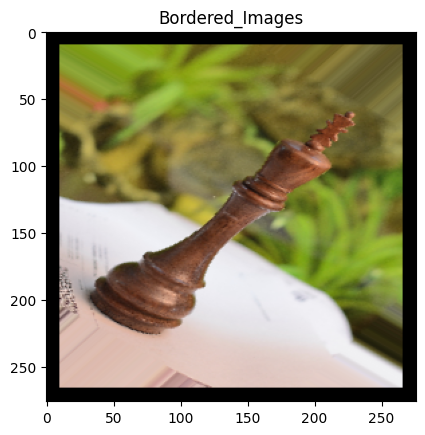

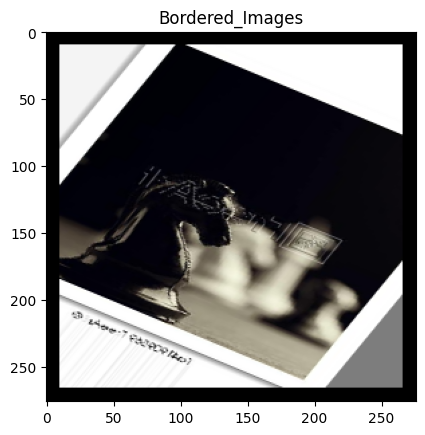

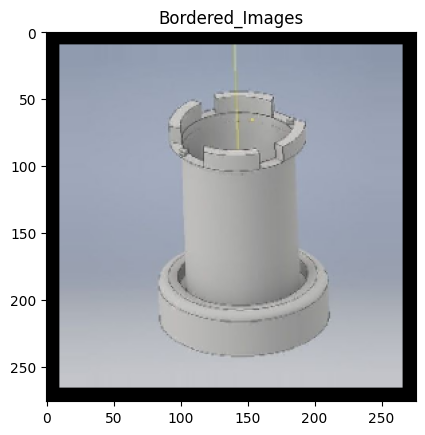

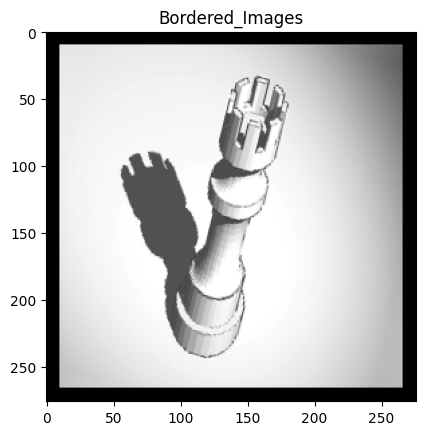

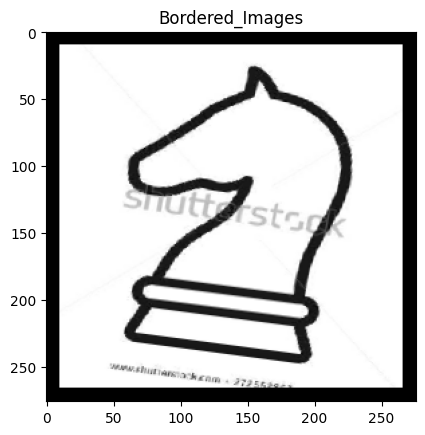

In [27]:
images, labels = train_data.next()

for i in range(5):
    image = cv2.copyMakeBorder(images[i], 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, value = 0) 
    plt.imshow(image)
    plt.title('Bordered_Images')
    plt.show()


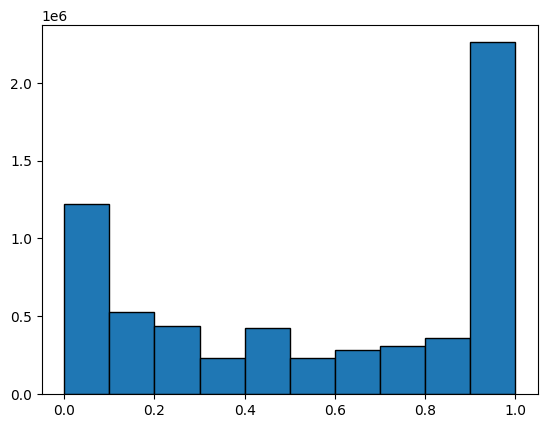

In [71]:
plt.hist(images.ravel(),range=[0, 1],edgecolor='black')
plt.show()

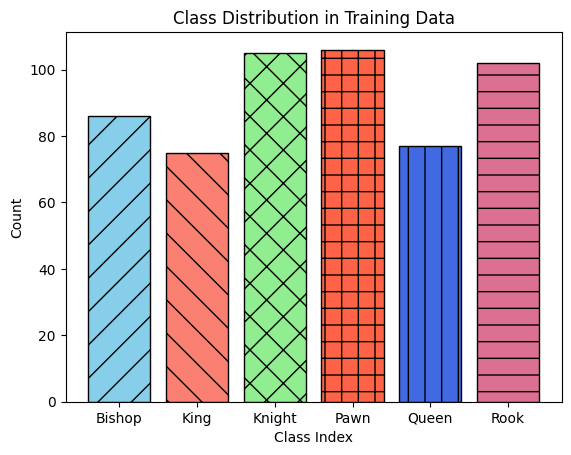

In [62]:
classcounts = train_data.classes
unique_classes = np.unique(classcounts)
class_distribution = np.bincount(classcounts)

labels = ["Bishop","King","Knight","Pawn","Queen","Rook"]
bar_colors = ['skyblue', 'salmon', 'lightgreen', 'tomato', 'royalblue', 'palevioletred']

fig,ax = plt.subplots()

bars = ax.bar(unique_classes,class_distribution, color=bar_colors, edgecolor='black')

bars[0].set_hatch('/')
bars[1].set_hatch('\\')
bars[2].set_hatch('x')
bars[3].set_hatch('+')
bars[4].set_hatch('|')
bars[5].set_hatch('-')

ax.set_title('Class Distribution in Training Data')
ax.set_xlabel('Class Index')
ax.set_ylabel('Count')
ax.set_xticks(unique_classes)
ax.set_xticklabels(labels)
# # plt.bar(unique_classes, class_distribution,color=bar_colors)
# plt.title('Class Distribution in Training Data')
# plt.xlabel('Class Index')
# plt.ylabel('Count')
# plt.xticks(unique_classes,labels)

plt.show()

# CARTOONING

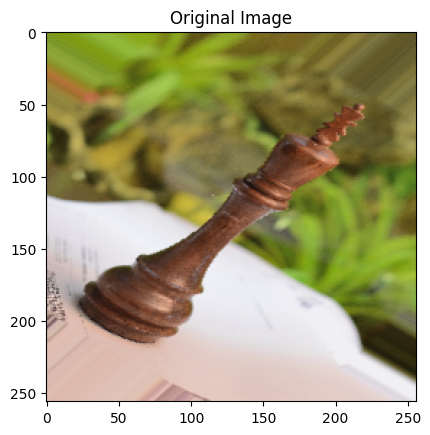

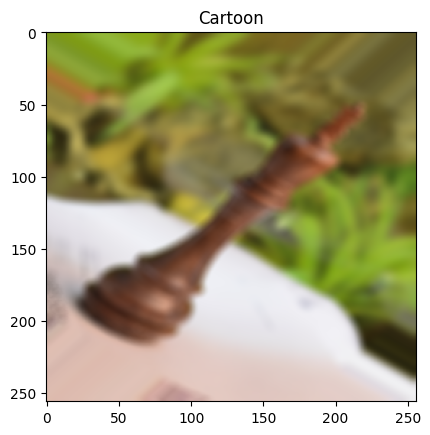

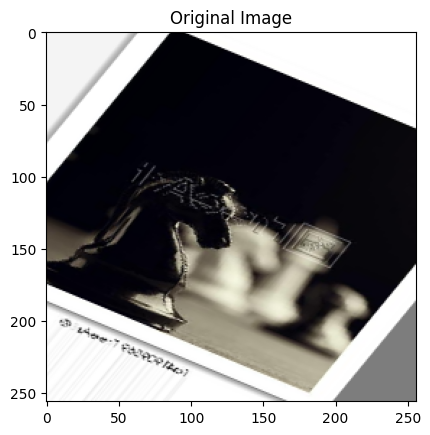

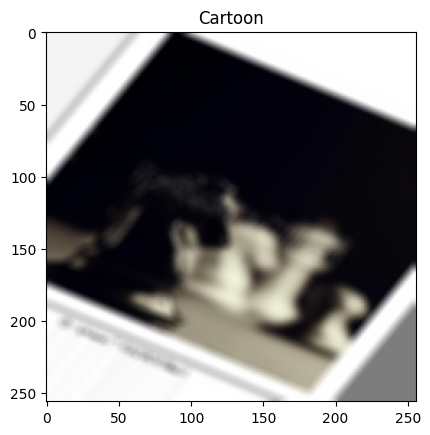

In [51]:
import cv2
for i in range(2):
    gray = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY) 
    gray = cv2.medianBlur(gray, 5) 
    gray = gray.astype('uint8')
    edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)

    # Cartoonization 
    color = cv2.bilateralFilter(images[i], 9, 200, 300) 
    cartoon = cv2.bitwise_and(color, color, mask=edges) 

    plt.imshow(images[i])
    plt.title('Original Image')
    plt.show()
    plt.imshow(cartoon)
    plt.title('Cartoon')
    plt.show()
    # cv2.waitKey(0) 
    # cv2.destroyAllWindows() 

# CORNER DETECTION

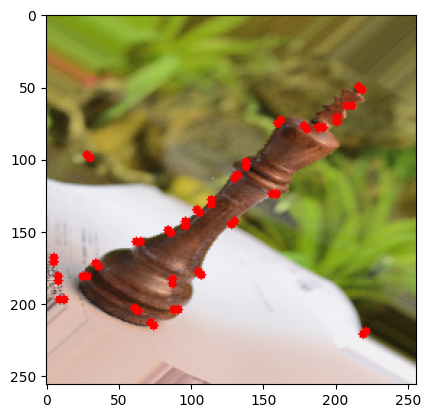

(<matplotlib.image.AxesImage at 0x79f7842637f0>, None)

In [54]:
gray = cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY) 
corners = cv2.goodFeaturesToTrack(gray, 27, 0.01, 10) 
corners = np.intp(corners) 
  
# we iterate through each corner,  
# making a circle at each point that we think is a corner. 
for i in corners: 
    x, y = i.ravel() 
    cv2.circle(images[0], (x, y), 3, 255, -1) 
  
plt.imshow(images[0]), plt.show() 

# CANNY EDGES IMAGE****

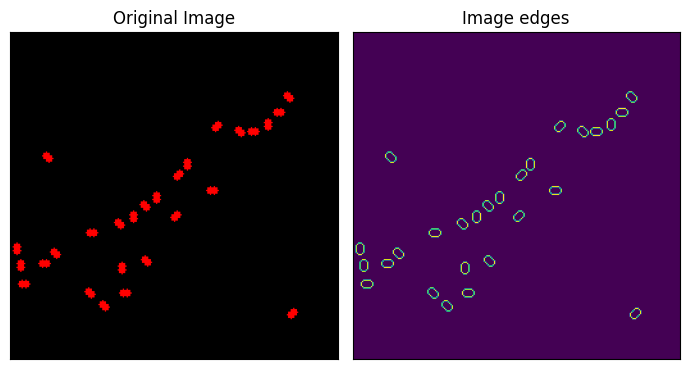

In [70]:
# image_rgb = cv2.cvtColor(images[0], cv2.COLOR_BGR2BGR)
image_rgb = images[0]
image_rgb = image_rgb.astype('uint8')
edges = cv2.Canny(image= image_rgb, threshold1=100, threshold2=700) 
  
fig, ax = plt.subplots(1, 2, figsize=(7, 4)) 
  
ax[0].imshow(image_rgb) 
ax[0].set_title('Original Image') 
   
ax[1].imshow(edges) 
ax[1].set_title('Image edges') 
  
for i in ax: 
    i.set_xticks([]) 
    i.set_yticks([]) 
  
# Display the subplots 
plt.tight_layout() 
plt.show()